In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/sample_data/EBL.csv')
df.head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
0,2011-05-26,992.0,973.0,973.0,973.0,NaN,91.0,88543.0,0
1,2011-05-30,973.0,990.0,950.0,990.0,1.75,138.0,132510.0,0
2,2011-05-31,990.0,1000.0,971.0,1000.0,1.01,32.0,31578.0,0
3,2011-06-01,1000.0,999.0,980.0,980.0,-2.00,166.0,164140.0,0
4,2011-06-02,980.0,1075.0,1009.0,1075.0,9.69,103.0,106627.0,0


In [5]:
df.shape

(3182, 9)

In [6]:
df.describe()

,open,high,low,close,per_change,traded_quantity,traded_amount,status
count,3182.000000,3182.000000,3182.000000,3182.000000,3181.000000,3.182000e+03,3.182000e+03,3182.000000
mean,1201.372219,1216.444500,1185.992426,1201.343146,0.027042,2.317972e+04,2.075781e+07,-0.078253
std,816.277696,828.458382,807.696580,818.160002,2.342412,4.195551e+04,3.592017e+07,0.694777
min,420.000000,423.000000,411.000000,413.000000,-43.570000,1.000000e+01,8.080000e+03,-1.000000
25%,597.850000,604.000000,589.925000,596.250000,-0.850000,4.645000e+03,5.176514e+06,-1.000000
50%,759.500000,769.500000,744.000000,755.000000,0.000000,1.029800e+04,1.032378e+07,0.000000
75%,1731.000000,1757.500000,1710.000000,1731.000000,0.790000,2.509575e+04,2.210051e+07,0.000000
max,3795.000000,3920.000000,3706.000000,3795.000000,15.890000,1.086498e+06,8.762993e+08,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   published_date   3182 non-null   object 
 1   open             3182 non-null   float64
 2   high             3182 non-null   float64
 3   low              3182 non-null   float64
 4   close            3182 non-null   float64
 5   per_change       3181 non-null   float64
 6   traded_quantity  3182 non-null   float64
 7   traded_amount    3182 non-null   float64
 8   status           3182 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 223.9+ KB


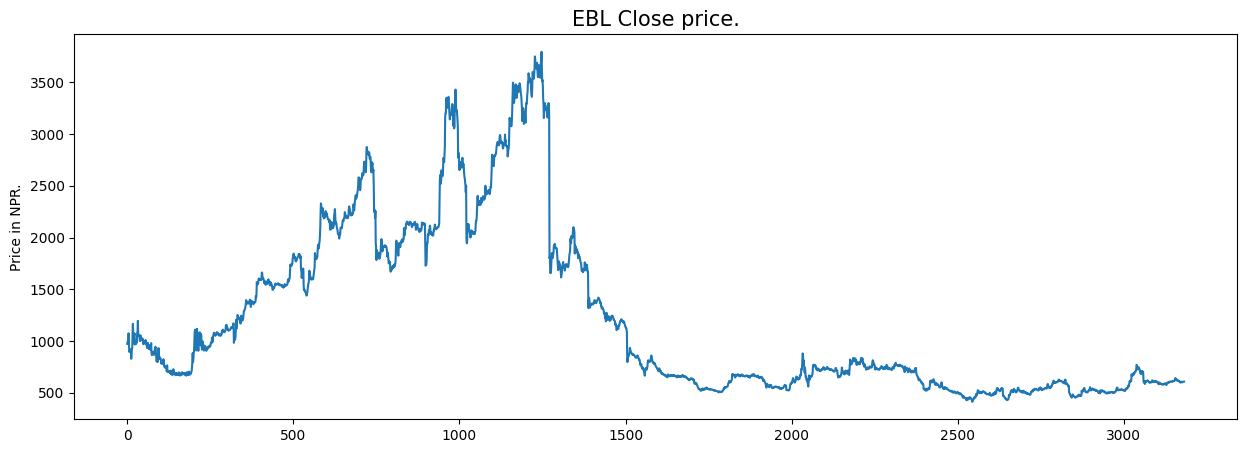

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('EBL Close price.', fontsize=15)
plt.ylabel('Price in NPR.')
plt.show()

In [9]:
df.head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
0,2011-05-26,992.0,973.0,973.0,973.0,NaN,91.0,88543.0,0
1,2011-05-30,973.0,990.0,950.0,990.0,1.75,138.0,132510.0,0
2,2011-05-31,990.0,1000.0,971.0,1000.0,1.01,32.0,31578.0,0
3,2011-06-01,1000.0,999.0,980.0,980.0,-2.00,166.0,164140.0,0
4,2011-06-02,980.0,1075.0,1009.0,1075.0,9.69,103.0,106627.0,0


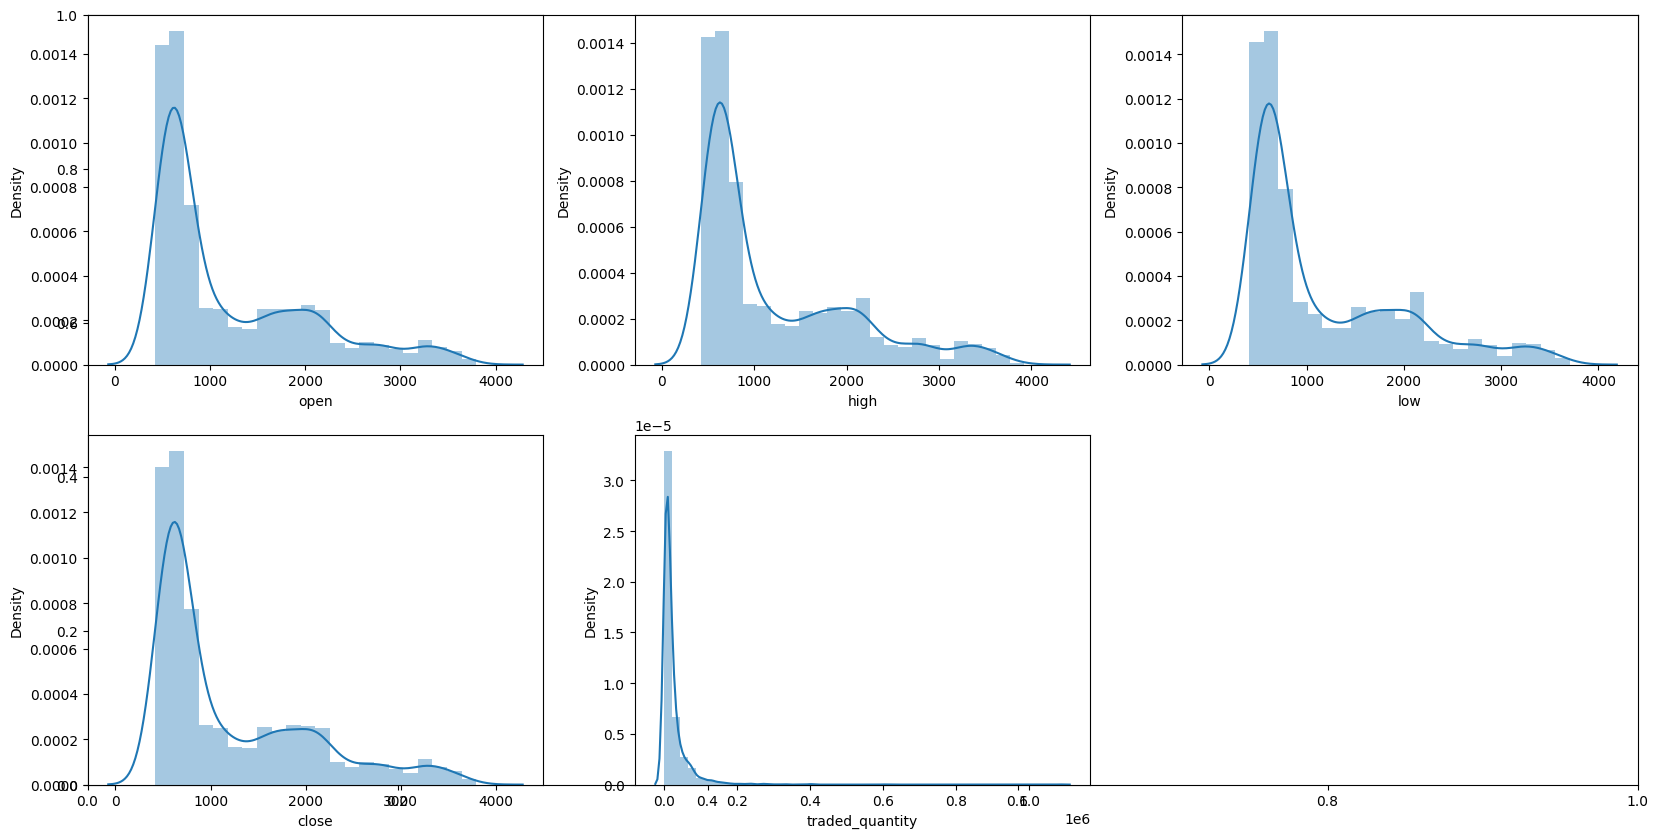

In [10]:
features = ['open', 'high', 'low', 'close', 'traded_quantity']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

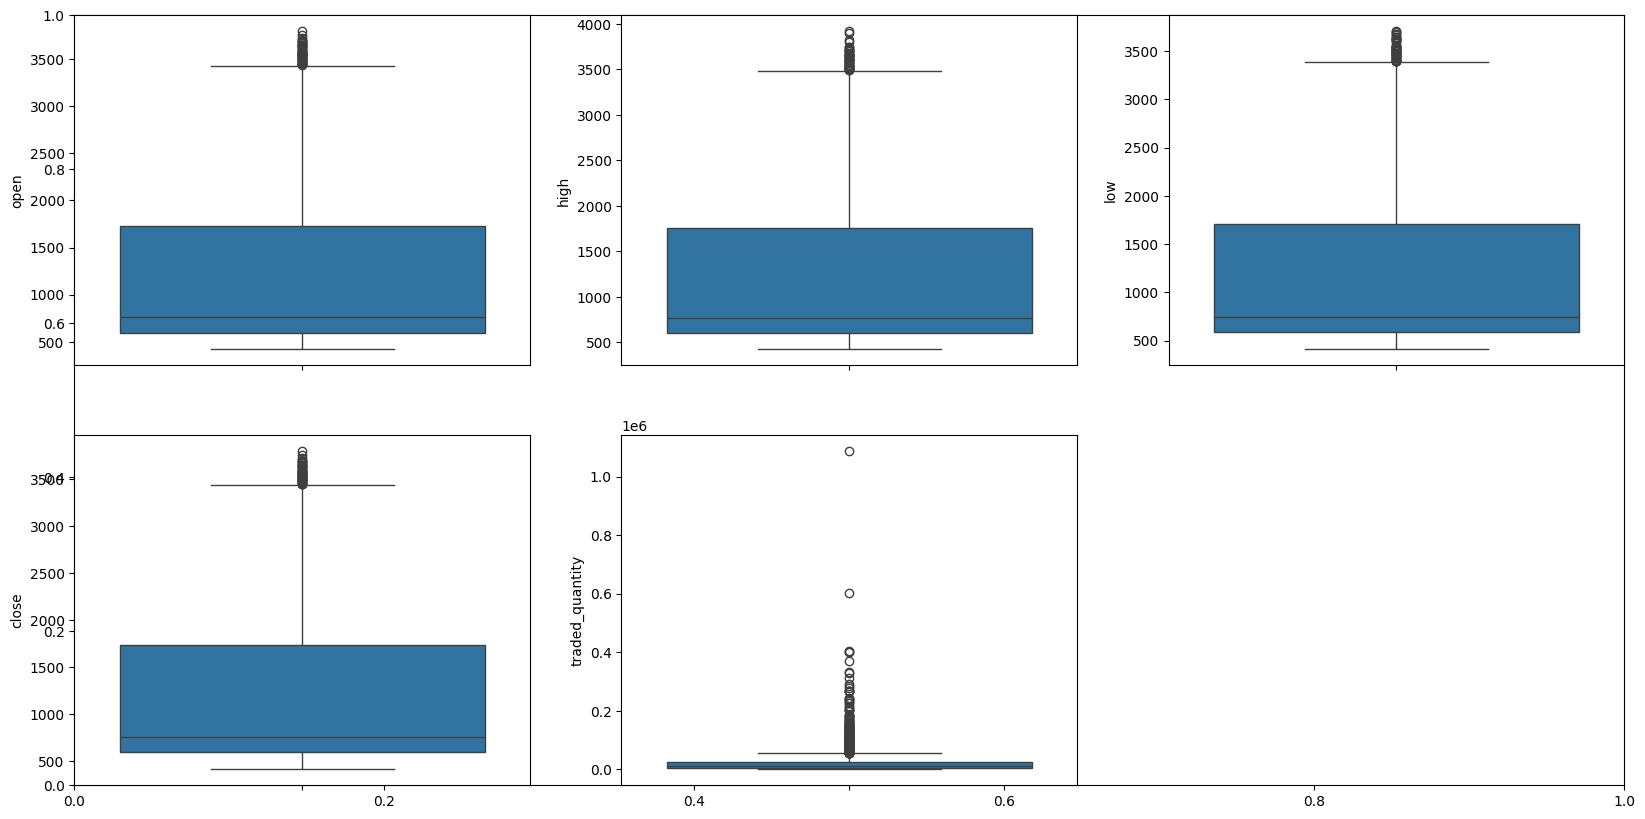

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['published_date'].str.split('/', expand=True)

# Check if the required columns exist before accessing them
if 1 in splitted.columns and 0 in splitted.columns and 2 in splitted.columns:
    df['day'] = splitted[1].astype('int')
    df['month'] = splitted[0].astype('int')
    df['year'] = splitted[2].astype('int')
else:
    # Handle cases where the expected columns are missing
    # For example, you could print a warning or fill with default values
    print("Warning: 'published_date' format is inconsistent. Day, month, or year might be missing.")
    # You might need to adjust this based on your specific data and requirements
    df['year'] = pd.to_datetime(df['published_date']).dt.year
    df['month'] = pd.to_datetime(df['published_date']).dt.month
    df['day'] = pd.to_datetime(df['published_date']).dt.day




df.head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,year,month,day
0,2011-05-26,992.0,973.0,973.0,973.0,NaN,91.0,88543.0,0,2011,5,26
1,2011-05-30,973.0,990.0,950.0,990.0,1.75,138.0,132510.0,0,2011,5,30
2,2011-05-31,990.0,1000.0,971.0,1000.0,1.01,32.0,31578.0,0,2011,5,31
3,2011-06-01,1000.0,999.0,980.0,980.0,-2.00,166.0,164140.0,0,2011,6,1
4,2011-06-02,980.0,1075.0,1009.0,1075.0,9.69,103.0,106627.0,0,2011,6,2


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,year,month,day,is_quarter_end
0,2011-05-26,992.0,973.0,973.0,973.0,NaN,91.0,88543.0,0,2011,5,26,0
1,2011-05-30,973.0,990.0,950.0,990.0,1.75,138.0,132510.0,0,2011,5,30,0
2,2011-05-31,990.0,1000.0,971.0,1000.0,1.01,32.0,31578.0,0,2011,5,31,0
3,2011-06-01,1000.0,999.0,980.0,980.0,-2.00,166.0,164140.0,0,2011,6,1,1
4,2011-06-02,980.0,1075.0,1009.0,1075.0,9.69,103.0,106627.0,0,2011,6,2,1


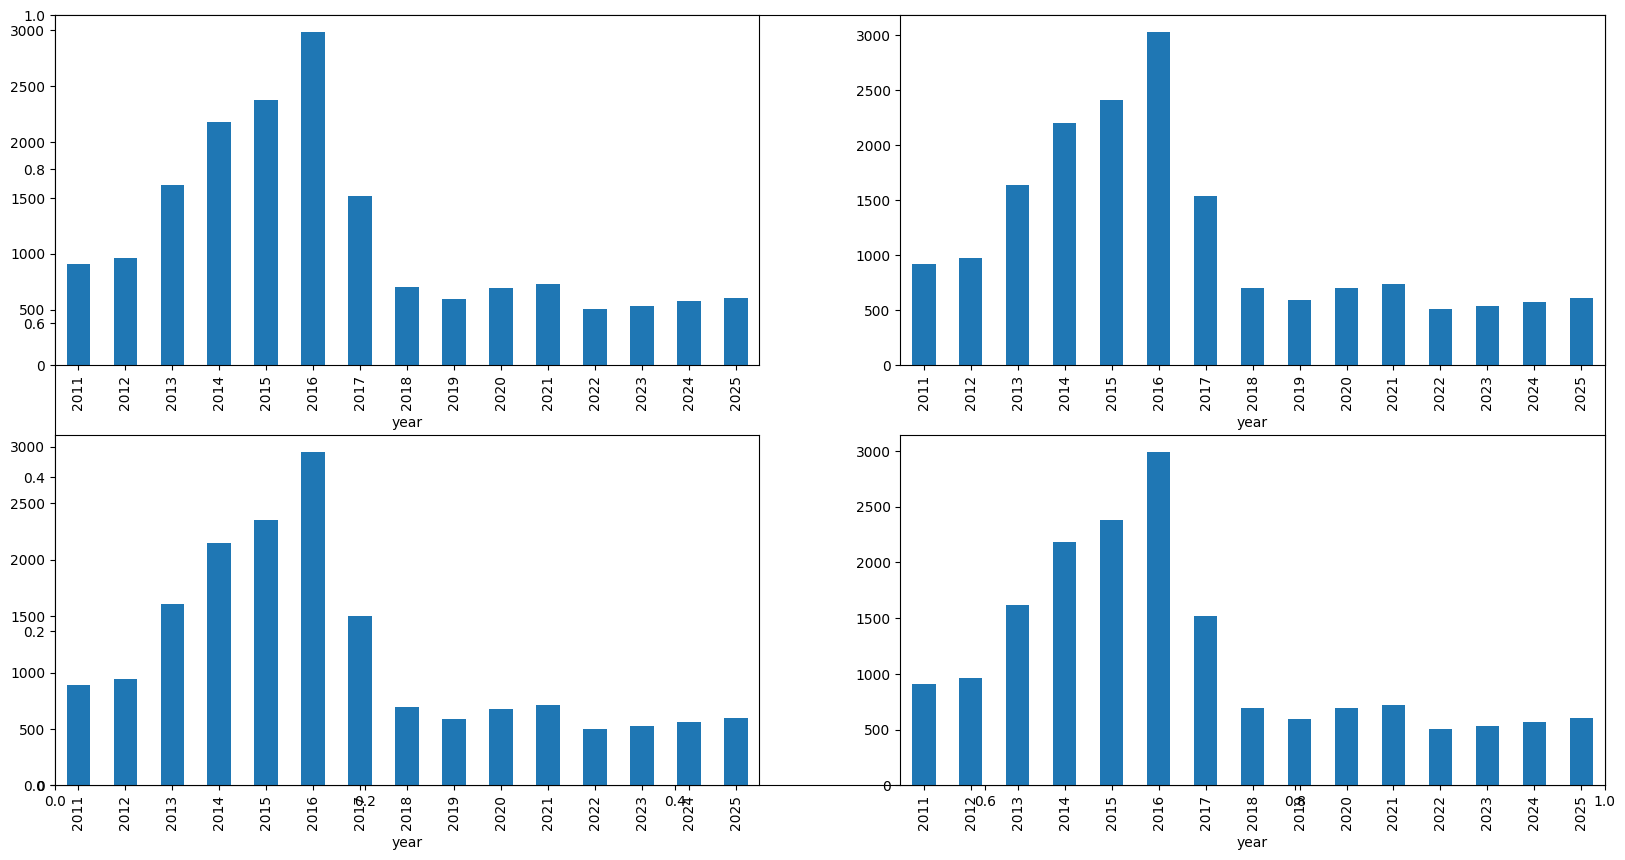

In [14]:
data_grouped = df.drop('published_date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [15]:
df.drop('published_date', axis=1).groupby('is_quarter_end').mean()

,open,high,low,close,per_change,traded_quantity,traded_amount,status,year,month,day
is_quarter_end,,,,,,,,,,,
0,1202.148138,1217.000334,1186.790544,1201.891504,0.108505,24571.366762,2.151920e+07,-0.066380,2017.927889,5.938873,15.634670
1,1199.878860,1215.374724,1184.456342,1200.287757,-0.129669,20501.315257,1.929241e+07,-0.101103,2017.728860,7.582721,15.538603


In [16]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

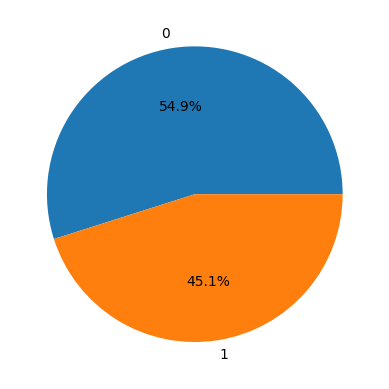

In [17]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

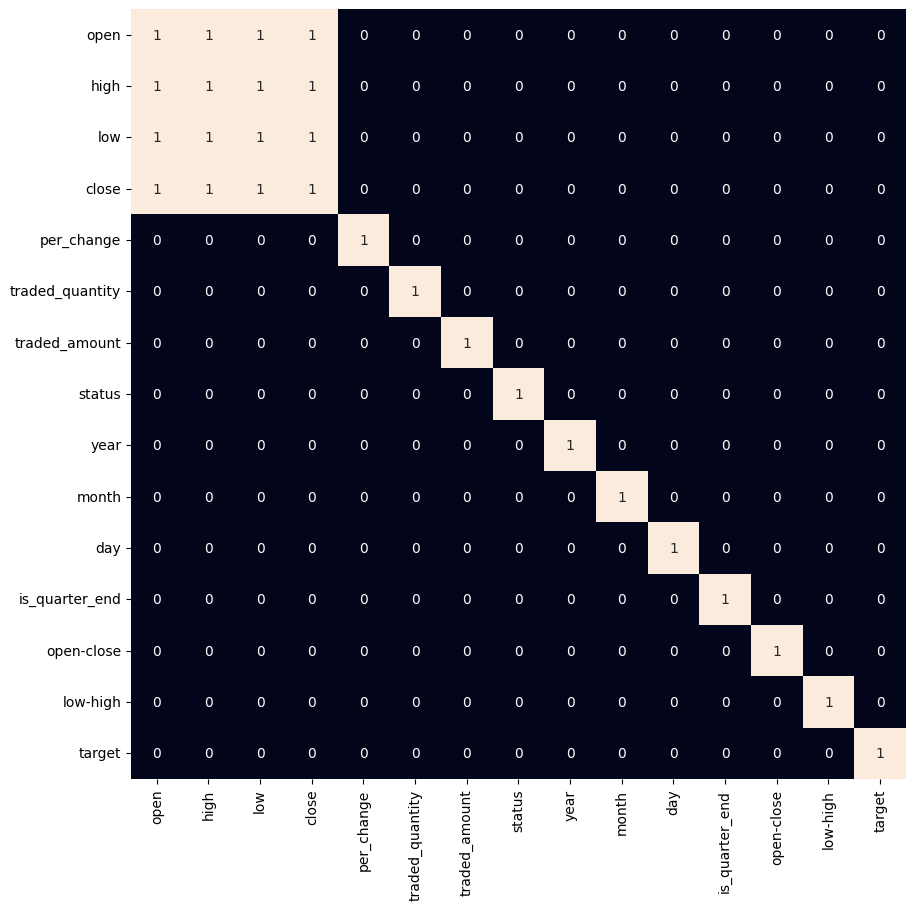

In [18]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('published_date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2863, 3) (319, 3)


In [20]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5370332527779752
Validation Accuracy :  0.5517736353625924

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5025973179804298
Validation Accuracy :  0.5679369199307849

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

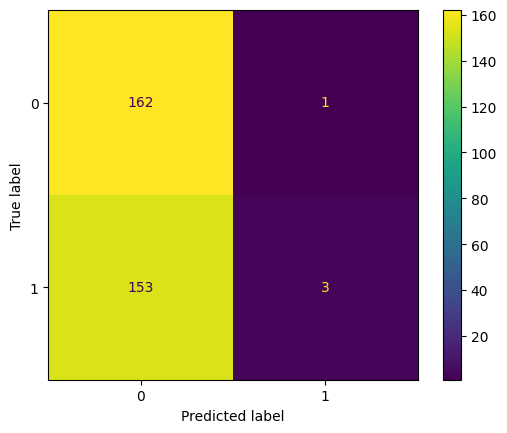

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()